# Draw response matrix $K^{ij}$ and differentially for $l=$ genPt and $j=$recoPt : $K^{ij}_l$

#### Load packages

In [1]:
import train as tn
#reload(tn)

import plotting
#reload(plotting)

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import numpy as np

from pprint import pprint

import pandas as pd

import os
import json
import importlib

import util as ut
reload(ut)

Welcome to JupyROOT 6.08/06


<module 'util' from 'util.pyc'>

In [2]:
ut.defaultParameters(dataDir="/home/janik/Model_dep_MoriondDataSet/MoriondAnalysis/data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                          load = True,
                     inputName = 'b',#"2clfs",
#                       outName = "3clfs_GenIsoAdded_out",
                        outDir = './classifiers',
                    inputDir = '/home/janik/Model_dep_MoriondDataSet/MoriondAnalysis/classifiers',
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 },
                     dataFiles=[(0,'output_GluGluHToGG_M125_IA.root'),                   
                                (1,'output_ttHToGG_M125_IA.root'),                     
                                (2,'output_VBFHToGG_M125_IA.root'),                            
                                (3,'output_VHToGG_M125_IA.root'),
                               ]
                    )


In [3]:
ut.setParams()
# manual fix in order that the json file doesn't overwrite inputDir
#ut.params['inputDir'] = "/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/classifiers"

# manual fix as rapidities are not yet included in n-tuples

ut.params['genBranches'] = ['genPt', 'genRapidity', 'genJet2p5Pt0', 'genJet2p5Pt1', 'genJet2p5Pt2', 
                            'genJet2p5Pt3', 'genJet2p5Pt4', 'genJet2p5Pt5', 'genJet2p5Rapidity0', 
                            'genJet2p5Rapidity1', 'genJet2p5Rapidity2', 'genJet2p5Rapidity3', 
                            'genJet2p5Rapidity4', 'genJet2p5Rapidity5', 'weight', 'genNjets2p5', 
                            'genLeadGenIso', 'genSubleadGenIso', 
                            #'absCosDeltaAlpha01', 'absCosDeltaAlpha02',
                            #'absCosDeltaAlpha03', 'absCosDeltaAlpha04', 'absCosDeltaAlpha05', 
                            #'absCosDeltaAlpha12', 'absCosDeltaAlpha13', 'absCosDeltaAlpha14', 
                            #'absCosDeltaAlpha15', 'absCosDeltaAlpha23', 'absCosDeltaAlpha24', 
                            #'absCosDeltaAlpha25', 'absCosDeltaAlpha34', 'absCosDeltaAlpha35', 
                            #'absCosDeltaAlpha45', 'absCosDeltaPhi01', 'absCosDeltaPhi02', 
                            #'absCosDeltaPhi03', 'absCosDeltaPhi04', 'absCosDeltaPhi05', 
                            #'absCosDeltaPhi12', 'absCosDeltaPhi13', 'absCosDeltaPhi14', 
                            #'absCosDeltaPhi15', 'absCosDeltaPhi23', 'absCosDeltaPhi24', 
                            #'absCosDeltaPhi25', 'absCosDeltaPhi34', 'absCosDeltaPhi35', 'absCosDeltaPhi45'
] 
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_125_13TeV'


ut.params['recoBranches'] = ['recoPt','recoRapidity','recoNjets2p5']

entered config files named my_train_config
hi
None


#### Load the Classifier trained with SM

In [4]:
%time FitterSM = ut.loadOrMake()

Load object with the name b and the following paramters 
{'classifiers': ['class', 'recoPt', 'recoNjets2p5'],
 'clean': [],
 'dataDir': '/home/janik/Model_dep_MoriondDataSet/MoriondAnalysis/data',
 'dataFiles': [(0, 'output_GluGluHToGG_M125_IA.root'),
               (1, 'output_ttHToGG_M125_IA.root'),
               (2, 'output_VBFHToGG_M125_IA.root'),
               (3, 'output_VHToGG_M125_IA.root')],
 'dataFname': 'output_InsideAcceptance_125.root',
 'defineBins': {'recoNjets2p5': {'boundaries': [-0.5,
                                                0.5,
                                                1.5,
                                                2.5,
                                                3.5,
                                                100.0],
                                 'overflow': False},
                'recoPt': {'boundaries': [0.0,
                                          15.0,
                                          30.0,
                          

/home/janik/anaconda2/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/janik/anaconda2/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/janik/anaconda2/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator PriorProbabilityEstimator from version 0.18 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/janik/anaconda2/lib/python2.7/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.18 when using version 0.18.1. This might

#### Load all the BSM files from scratch

In [ ]:
                                        ut.defaultParameters(dataDir="/home/janik/Model_dep_MoriondDataSet/MoriondAnalysis/data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 }
                    )

ut.params['load'] = False


ut.params['genBranches'] = ['genPt', 'genRapidity', 'genJet2p5Pt0', 'genJet2p5Pt1', 'genJet2p5Pt2', 
                            'genJet2p5Pt3', 'genJet2p5Pt4', 'genJet2p5Pt5', 'genJet2p5Rapidity0', 
                            'genJet2p5Rapidity1', 'genJet2p5Rapidity2', 'genJet2p5Rapidity3', 
                            'genJet2p5Rapidity4', 'genJet2p5Rapidity5', 'weight', 'genNjets2p5', 
                            'genLeadGenIso', 'genSubleadGenIso', 
                            #'absCosDeltaAlpha01', 'absCosDeltaAlpha02',
                            #'absCosDeltaAlpha03', 'absCosDeltaAlpha04', 'absCosDeltaAlpha05', 
                            #'absCosDeltaAlpha12', 'absCosDeltaAlpha13', 'absCosDeltaAlpha14', 
                            #'absCosDeltaAlpha15', 'absCosDeltaAlpha23', 'absCosDeltaAlpha24', 
                            #'absCosDeltaAlpha25', 'absCosDeltaAlpha34', 'absCosDeltaAlpha35', 
                            #'absCosDeltaAlpha45', 'absCosDeltaPhi01', 'absCosDeltaPhi02', 
                            #'absCosDeltaPhi03', 'absCosDeltaPhi04', 'absCosDeltaPhi05', 
                            #'absCosDeltaPhi12', 'absCosDeltaPhi13', 'absCosDeltaPhi14', 
                            #'absCosDeltaPhi15', 'absCosDeltaPhi23', 'absCosDeltaPhi24', 
                            #'absCosDeltaPhi25', 'absCosDeltaPhi34', 'absCosDeltaPhi35', 'absCosDeltaPhi45'
] 

ut.params['recoBranches'] = ['recoPt','recoRapidity','recoNjets2p5']


ut.params['dataFiles'] = [(4,'output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV'


effFitter_BSM_1 = ut.loadFromScratch()


ut.params['dataFiles'] = [(5,'output_SMS-T2bH_mSbottom-450_mLSP-200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV'

effFitter_BSM_2 = ut.loadFromScratch()

ut.params['dataFiles'] = [(6,'output_SMS-T2bH_mSbottom-500_mLSP-1_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV'

effFitter_BSM_3 = ut.loadFromScratch()
    

In [ ]:
df_BSM1 = effFitter_BSM_1.df
df_BSM2 = effFitter_BSM_2.df
df_BSM3 = effFitter_BSM_3.df

df_BSM = pd.concat([df_BSM1,df_BSM2,df_BSM3],ignore_index=True)

#df_BSM['proc']

In [ ]:
"""for c in df_BSM1.columns :
    print c
print "------------"
for q in FitterSM.df.columns :
    print q"""

In [ ]:
"""
Chaange type from categorical to float
"""
df_BSM['recoPtBin'] = df_BSM['recoPtBin'].astype=('float')
df_BSM['recoNjets2p5Bin'] = df_BSM['recoNjets2p5Bin'].astype=('float')
#df = pd.DataFrame(a, dtype='float')

In [ ]:
FitterSM.df = FitterSM.df.append(df_BSM,ignore_index=False)

In [ ]:
prob_names = []
for col in FitterSM.df.columns :
    if '_prob_' in col :
        prob_names.append(col)

In [ ]:
print prob_names

In [ ]:
df = FitterSM.df

In [ ]:
df.columns

In [ ]:
print FitterSM.df.columns

#### delete probabilities in order that they are re-evaluated also on the BSM

In [ ]:
for name in prob_names :
    del FitterSM.df[name]

In [ ]:
#reload(ut)
ut.runEvaluation(FitterSM)

In [ ]:
#df = FitterSM.df

# Draw Histograms

In [5]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    if (n==4) :
        return 'BSM1'
    if (n==5) :
        return 'BSM2'
    if (n==6) :
        return 'BSM3'

In [6]:
bins_dict = { 'genPt'        : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,1000]), 
             }
ut.runDefineBins(FitterSM,bins_dict)

genPt
<type 'str'>


In [7]:
df = FitterSM.df

In [8]:
first_train_evt = int(round(FitterSM.df.index.size*(1.-FitterSM.split_frac)))
BSM_mask = df['proc'].isin([4,5,6])
#take the test sample \
print first_train_evt
df = FitterSM.df[:first_train_evt].append(FitterSM.df[BSM_mask],
                                          ignore_index=True)

348629


In [9]:
class_list = ['class','recoPt','recoNjets2p5']
#class_list = ['class']#,'recoNjets2p5']

save_directory = './plots/EffPlotgenPtScan/BSM1_2_3'
print(save_directory)
save_directory =None

./plots/EffPlotgenPtScan/BSM1_2_3


In [28]:
process_OfInterest = [0,1,2,3,4]#,5,6]

In [29]:
[GetProdProcName(n=s) for s in process_OfInterest]

['ggF', 'ttH', 'VBF', 'VH', 'BSM1']

There are 4 features of type class
[ 4.82844023  2.4406679   3.68868349  7.28028183]
class_ggF
F
There are 25 features of type recoPtCat
[ 4.7860669   0.46054538  0.54944588  0.36470404  0.51262428  0.20890976
  0.19512619  0.13350193  0.04465616  0.781075    0.89657253  0.60094219
  0.76840375  0.29411252  0.22534525  0.11318283  0.02539932  1.56076447
  1.83261121  1.20672641  1.52237899  0.57685999  0.40001111  0.15394666
  0.02416068]
recoPt_ggF
F
There are 16 features of type recoNjets2p5Cat
[ 4.81344382  1.32481808  0.68929814  0.28318914  0.097318    0.05761388
  2.16594602  0.99468278  0.35747456  0.11036177  0.06282352  4.44986905
  1.90527789  0.63803319  0.18886967  0.09905394]
recoNjets2p5_ggF
F


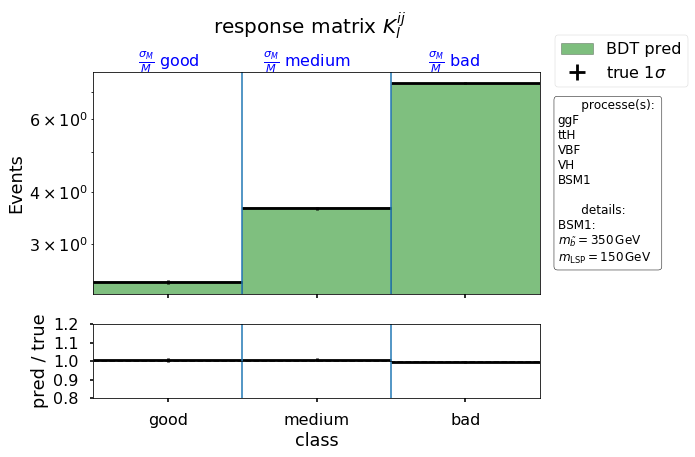

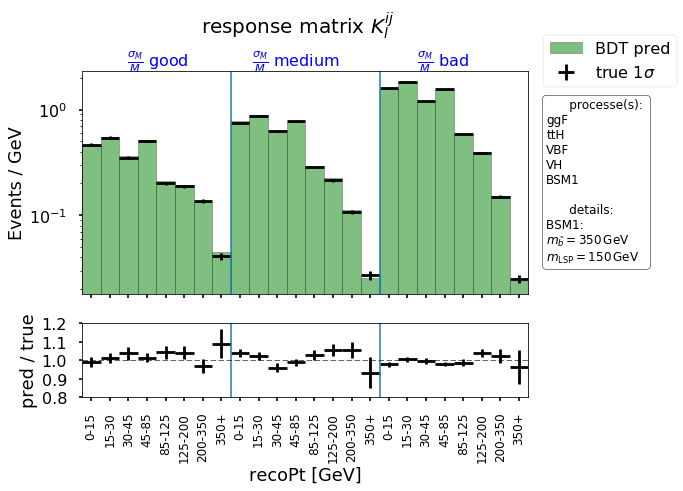

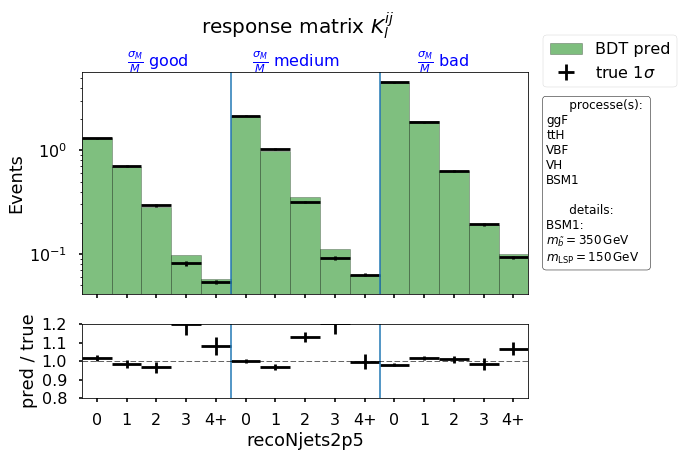

In [31]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
K_matrix=[]
for cl in class_list :
    p = plotting.draw_data_mc(
                df=df[proc_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                               column = cl, 
                              logy=True, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(process_OfInterest[0]),
                              absolute=False,
                            model_processes = [GetProdProcName(n=s) for s in process_OfInterest]
                             )
    #K_matrix.append(p)

TypeError: cannot concatenate 'str' and 'NoneType' objects

class
('Pt bin ', 0)
There are 4 features of type class
[ 1.05004603  0.45382188  0.770074    1.54725279]
class_ggFPtBin0
0
('Pt bin ', 1)
There are 4 features of type class
[ 1.14766118  0.52160714  0.86416832  1.74473482]
class_ggFPtBin1
1
('Pt bin ', 2)
There are 4 features of type class
[ 0.71422597  0.33201974  0.54668328  1.09240017]
class_ggFPtBin2
2
('Pt bin ', 3)
There are 4 features of type class
[ 0.85545093  0.43074124  0.64511897  1.27698009]
class_ggFPtBin3
3
('Pt bin ', 4)
There are 4 features of type class
[ 0.26763963  0.14686072  0.20855729  0.40912578]
class_ggFPtBin4
4
('Pt bin ', 5)
There are 4 features of type class
[ 0.16659679  0.13229135  0.15227383  0.26968376]
class_ggFPtBin5
5
('Pt bin ', 6)
There are 4 features of type class
[ 0.07977587  0.09323752  0.07820735  0.10886462]
class_ggFPtBin6
6
('Pt bin ', 7)
There are 4 features of type class
[ 0.0159249   0.0314795   0.01730157  0.01719316]
class_ggFPtBin7
7
recoPt
('Pt bin ', 0)
There are 25 features of typ

plotting.py:595: RuntimeWarning: invalid value encountered in divide
  hist_sigma = 1.*trueh*hist_sigma_0/hist_mu_0
plotting.py:672: RuntimeWarning: divide by zero encountered in divide
  rdata = corr / data
plotting.py:595: RuntimeWarning: divide by zero encountered in divide
  hist_sigma = 1.*trueh*hist_sigma_0/hist_mu_0
plotting.py:603: RuntimeWarning: divide by zero encountered in divide
  hist_s_pos = 1.*trueh*hist_s_pos/hist_mu_0
plotting.py:606: RuntimeWarning: divide by zero encountered in divide
  hist_s_neg = 1.*trueh*hist_s_neg/hist_mu_0
/home/janik/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


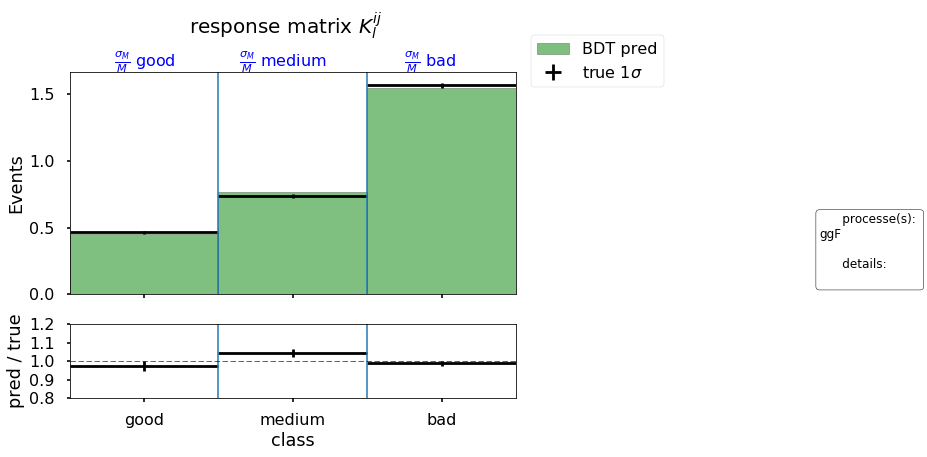

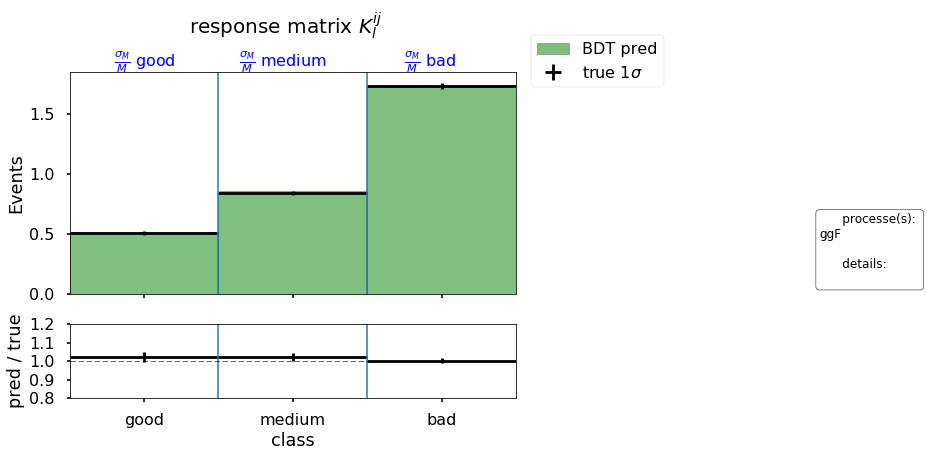

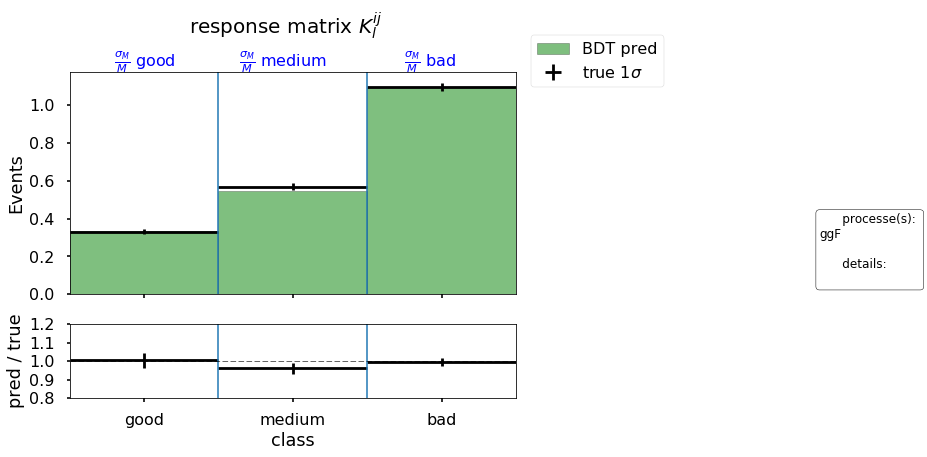

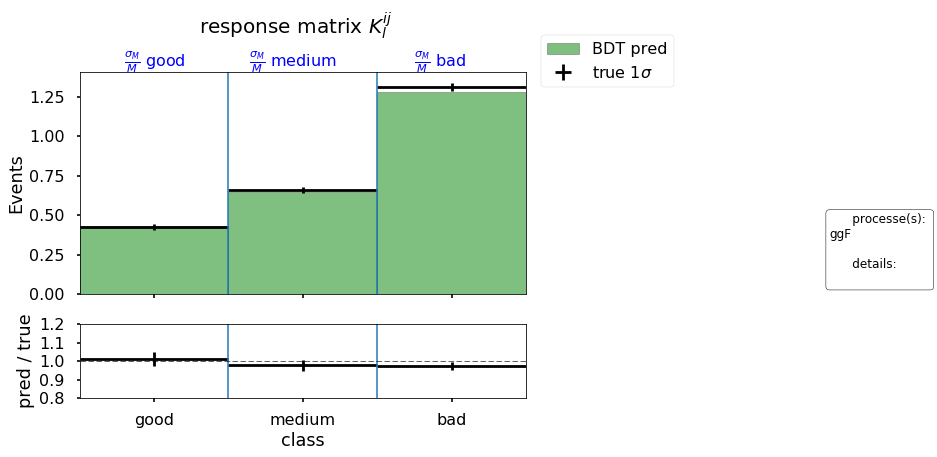

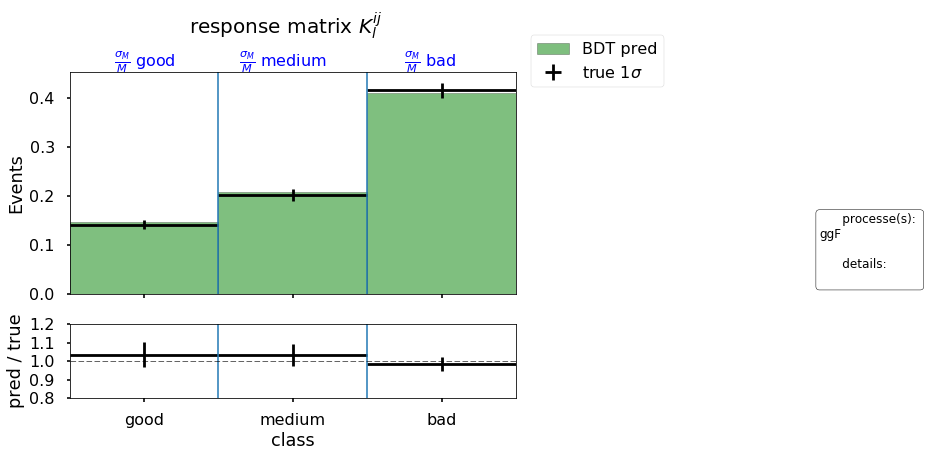

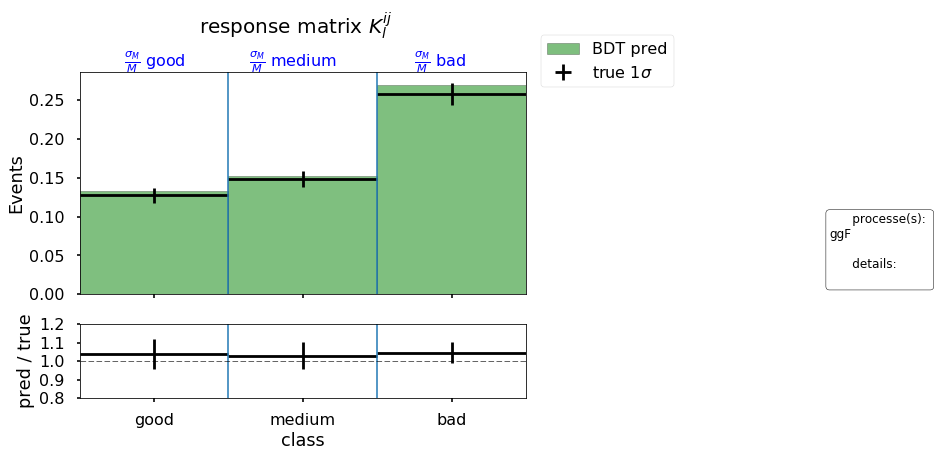

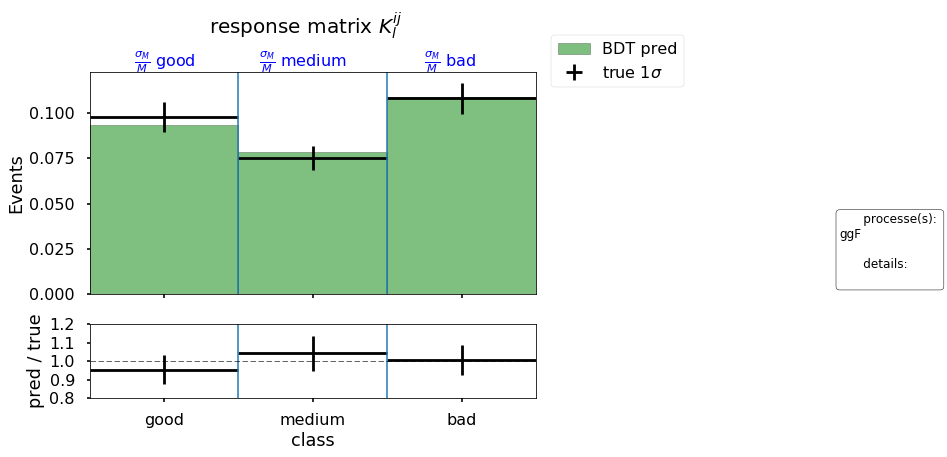

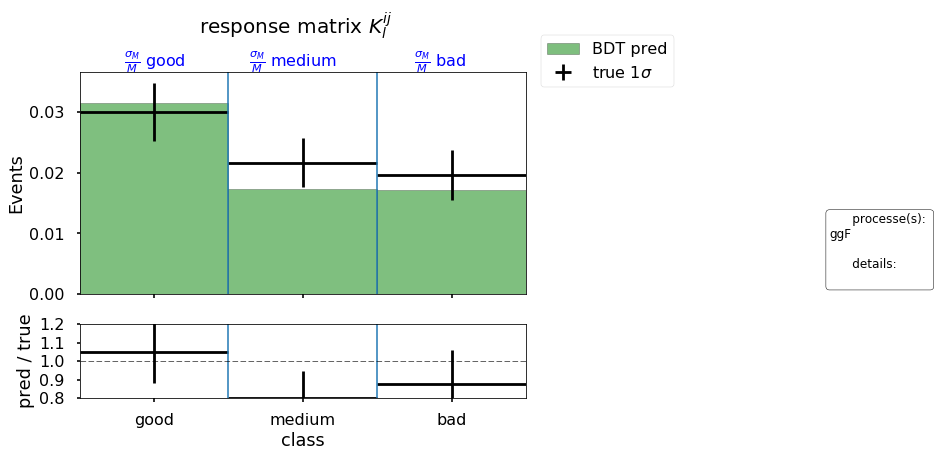

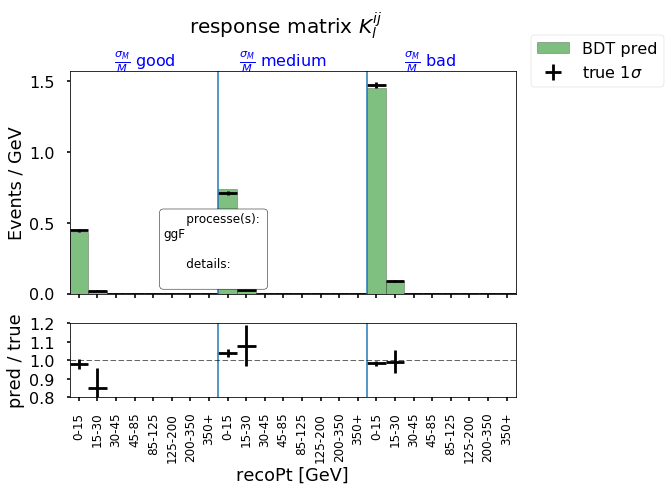

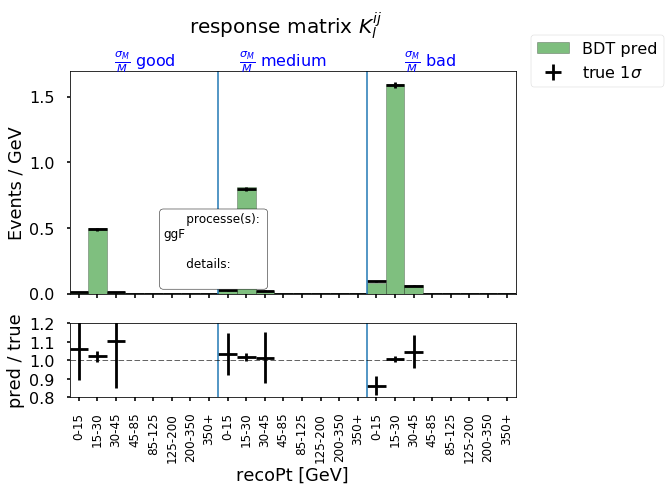

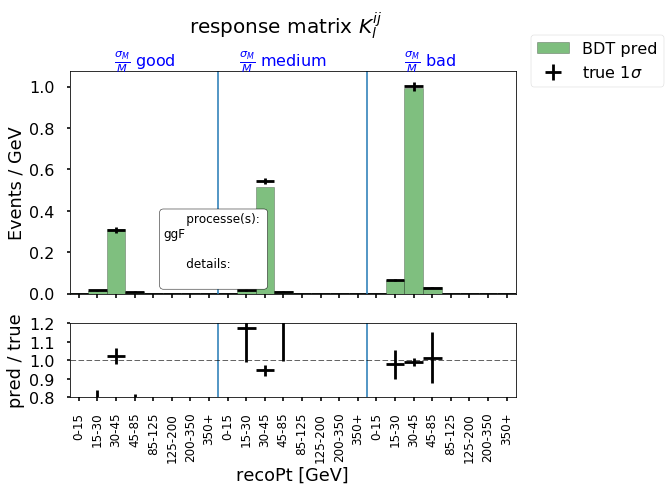

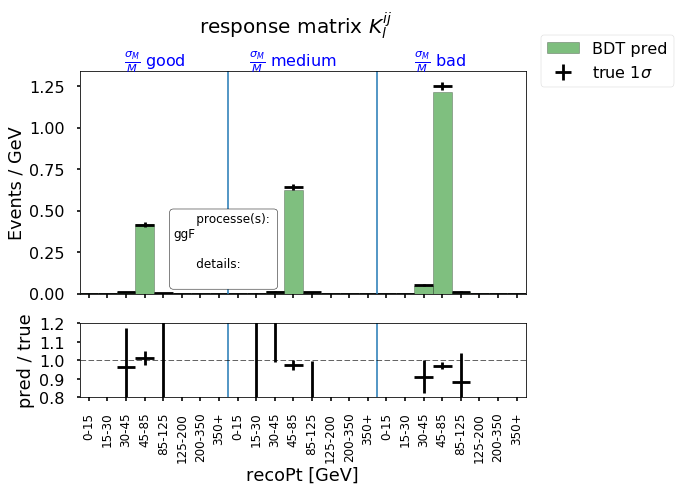

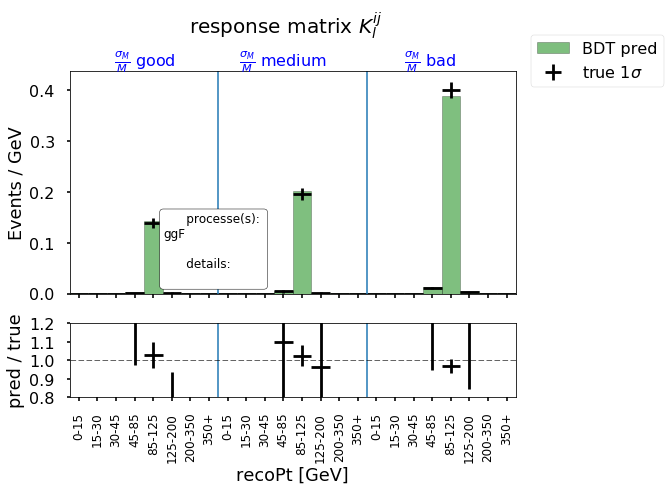

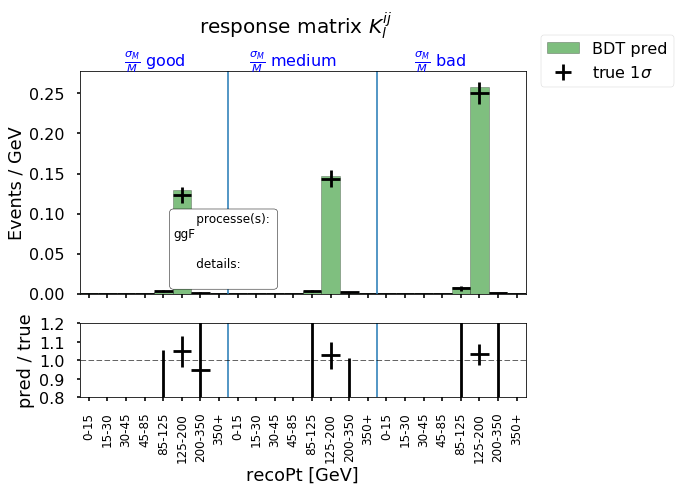

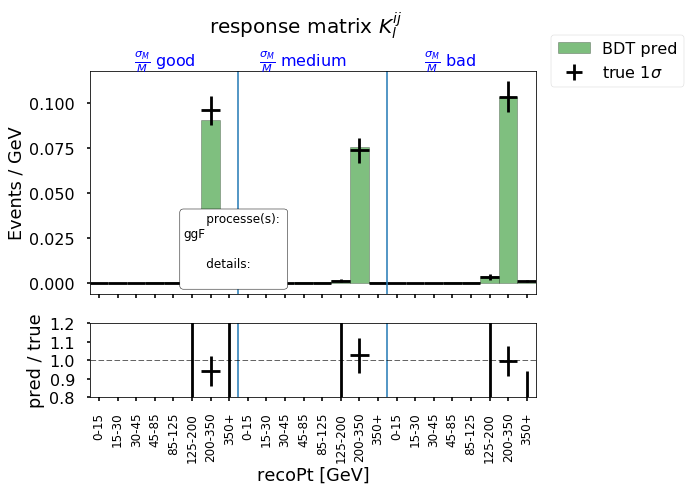

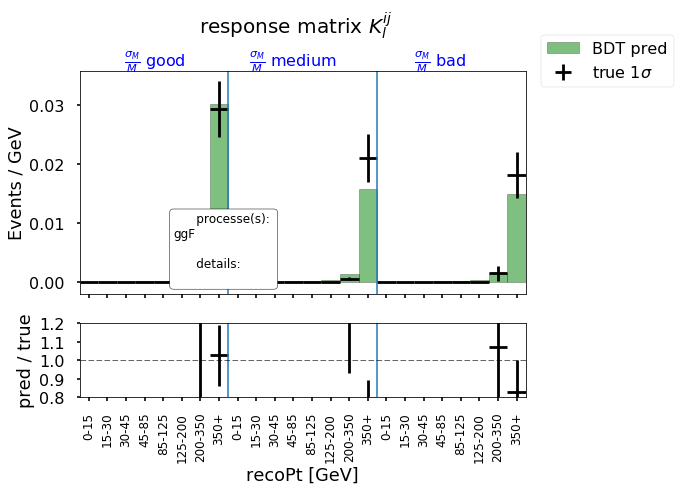

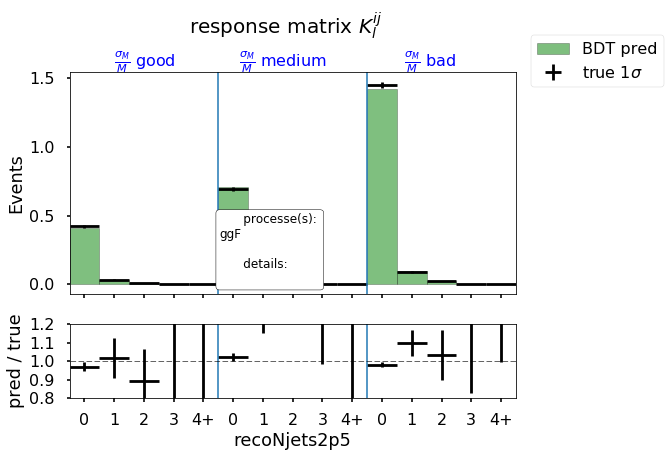

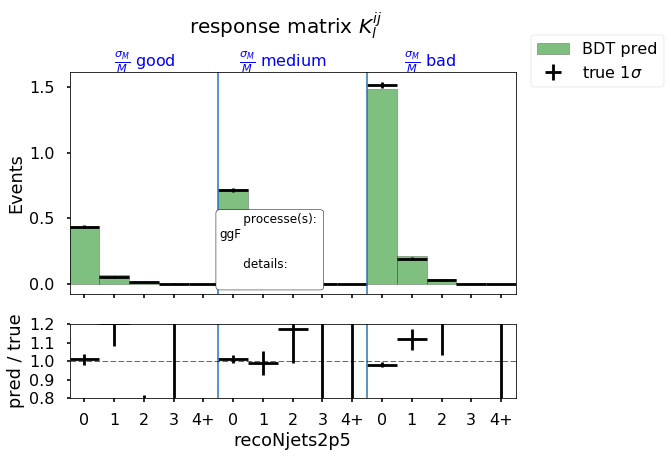

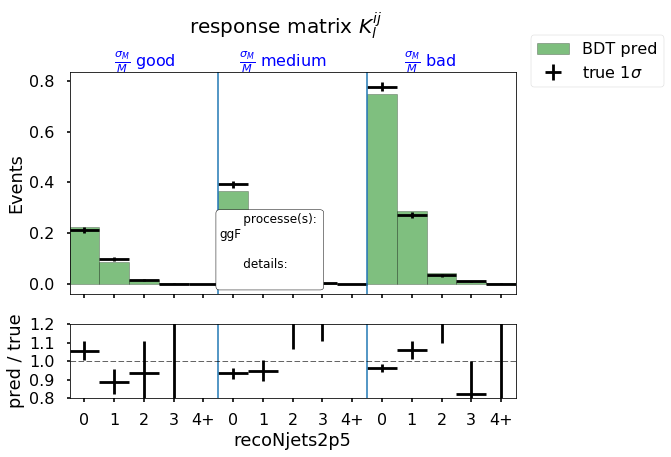

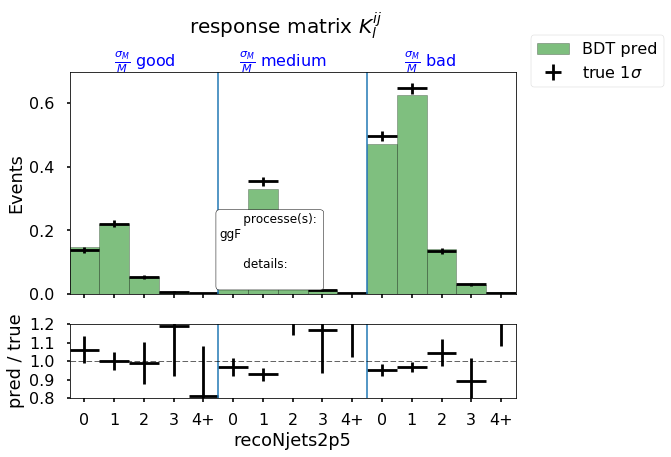

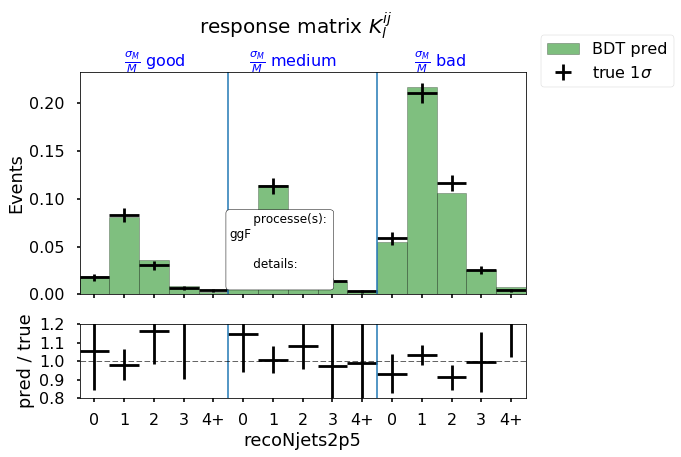

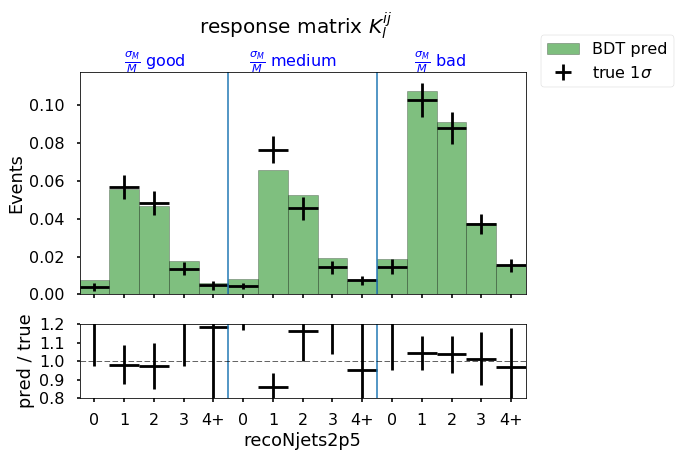

In [13]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
K_matrix=[]
for cl in class_list :
    print cl
    for Pt_bin in xrange(df['genPtBin'].min(),df['genPtBin'].max(),1) :
        print ('Pt bin ',Pt_bin)
        Pt_mask = df['genPtBin']==Pt_bin
        p = plotting.draw_data_mc(
                df=df[proc_mask&Pt_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                               column = cl, 
                              logy=False, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(process_OfInterest[0])+'PtBin'+str(Pt_bin),
                              absolute=False,
                            model_processes = [GetProdProcName(n=s) for s in process_OfInterest]
                             )
        #K_matrix.append(p)

In [ ]:
print np.shape(K_matrix)
K_matrix = np.reshape(K_matrix,np.shape(K_matrix)).T

In [ ]:
print type(K_matrix)
#normalize 
norm = sum(sum(K_matrix))
K_matrix = 1.*K_matrix / norm

In [ ]:
plt.imshow(K_matrix,interpolation='nearest')
plt.colorbar()

In [ ]:
np.save('response_GenRecoPt',K_matrix)

In [ ]:
df.columns

# Inspect Islation of the photons

In [ ]:
genPtBIN = 0


genIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]
genSubIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]


In [ ]:
for genPtBIN in xrange(8) :
    plt.hist(genIso_BSM1['genLeadGenIso'],bins=30,weights=genIso_BSM1['weight'])
    plt.xlabel('genLeadIso')
    plt.ylabel('No. of events')
    plt.title('BSM1 genPtBin'+str(genPtBIN))
    plt.show()


#plt.hist(genSubIso_BSM1['genSubleadGenIso'],bins=50,
#         weights=genSubIso_BSM1['weight'])
#plt.show()


In [ ]:
'reload(plotting)
for cl in class_list :
    for prod_mech in xrange(4,7,1) :
        
        plotting.draw_data_mc(df=df[df['proc']==prod_mech],
                               column = cl, 
                              logy=False, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(prod_mech),
                              absolute=False
                             )
        

In [ ]:
len(FitterSM.df['class'])

In [ ]:
for s in list(set(df_SM.columns)-set(df_BSM1.columns)) :
    df_BSM1[s] = 0
    print s

In [ ]:
#df_BSM1[0:5].T

In [ ]:
df_BSM1[0:1]

In [ ]:
col = df_SM.columns

In [ ]:
print np.shape(df_BSM1)
print np.shape(df_SM)

In [ ]:
#df_all = pd.concat([df_SM,df_BSM1])
print col

In [ ]:
print df_BSM1['recoPtBin'][0:5]
print df_BSM1['recoPtCat'][0:5]


In [ ]:
print df_SM['recoPtBin'][0:5]
print df_SM['recoPtCat'][0:5]


In [ ]:
r1 = df_SM[0:2][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]
r2 = df_BSM1[0:1][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]

In [ ]:
r1

In [ ]:
r2

In [ ]:
r1 = r1.append(r2,ignore_index=True)

In [ ]:
r1

In [ ]:
FitterSM.df = FitterSM.df.append(df_BSM1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
            #'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
              }
ut.runDefineBins(effFitter_BSM_1,defineBins)
df_BSM1 = effFitter_BSM_1.df
ut.runEvaluation(effFitter_BSM_1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
df_BSM1.columns